In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [333]:
data_path = "data/data_complete.csv"
import pandas as pd


data = pd.read_csv(data_path)
data = data.iloc[:, 2:]
data.corr()

,y,number_of_beds,markaze_behdasht,number_of_labs,number_of_active_beds,number_of_employees,number_of_doctors,number_of_pir_doctors,number_of_stuff,number_of_persons_in_hotels,...,number_of_person_bus_inside,number_of_person_bus_outside,number_of_person_minibus_inside,number_of_person_minibus_outside,number_of_person_car_inside,number_of_person_car_outside,covid,month,season,y_last
y,1.000000,2.399281e-01,4.161344e-02,1.610747e-01,2.724998e-01,1.698492e-01,1.650415e-01,1.771092e-01,-4.228183e-02,0.148756,...,3.700291e-01,3.745085e-01,9.912383e-02,1.013276e-01,7.271840e-02,5.132068e-01,-3.971455e-01,9.879220e-02,7.224622e-02,0.704775
number_of_beds,0.239928,1.000000e+00,5.824859e-01,7.957401e-01,9.770414e-01,3.643023e-01,7.244000e-01,5.542369e-01,-7.690607e-01,0.411848,...,-9.664586e-02,5.639208e-01,1.929488e-01,-3.688781e-01,4.397412e-01,7.273239e-01,3.810704e-01,-1.248508e-15,-6.633133e-16,0.220342
markaze_behdasht,0.041613,5.824859e-01,1.000000e+00,9.064344e-01,5.150686e-01,6.420488e-01,9.322309e-01,7.539719e-01,-5.775128e-01,0.782087,...,-7.174227e-01,-4.689395e-03,-5.325869e-01,-8.377293e-01,-2.312355e-02,6.284495e-01,7.097772e-01,1.548385e-16,9.276387e-16,0.020004
number_of_labs,0.161075,7.957401e-01,9.064344e-01,1.000000e+00,7.536881e-01,7.233086e-01,9.911801e-01,8.561865e-01,-6.262898e-01,0.655541,...,-4.478700e-01,1.062029e-01,-3.207444e-01,-6.870417e-01,2.544742e-01,7.857780e-01,6.335566e-01,-1.797126e-16,6.149463e-16,0.128428
number_of_active_beds,0.272500,9.770414e-01,5.150686e-01,7.536881e-01,1.000000e+00,3.756456e-01,6.773546e-01,5.548222e-01,-7.045368e-01,0.383812,...,-1.894320e-02,6.098057e-01,2.583057e-01,-2.833664e-01,4.748816e-01,7.484728e-01,2.998357e-01,-2.989046e-16,2.872034e-16,0.268595
number_of_employees,0.169849,3.643023e-01,6.420488e-01,7.233086e-01,3.756456e-01,1.000000e+00,7.380843e-01,9.728615e-01,8.175098e-02,0.572486,...,-4.304539e-01,-1.675588e-02,-6.287179e-01,-5.760132e-01,-1.963334e-01,6.293260e-01,3.473333e-01,-4.594137e-16,-4.046996e-17,0.145218
number_of_doctors,0.165042,7.244000e-01,9.322309e-01,9.911801e-01,6.773546e-01,7.380843e-01,1.000000e+00,8.560002e-01,-5.883521e-01,0.661473,...,-4.784434e-01,3.099809e-02,-3.781719e-01,-6.909283e-01,2.152330e-01,7.907960e-01,6.295676e-01,-1.343976e-16,6.335616e-16,0.135394
number_of_pir_doctors,0.177109,5.542369e-01,7.539719e-01,8.561865e-01,5.548222e-01,9.728615e-01,8.560002e-01,1.000000e+00,-1.454877e-01,0.640548,...,-4.563296e-01,7.032532e-02,-5.484392e-01,-6.483219e-01,-6.449106e-02,7.168932e-01,4.557843e-01,-3.730288e-16,1.887185e-16,0.148952
number_of_stuff,-0.042282,-7.690607e-01,-5.775128e-01,-6.262898e-01,-7.045368e-01,8.175098e-02,-5.883521e-01,-1.454877e-01,1.000000e+00,-0.320804,...,1.668301e-01,-2.412601e-01,-2.639089e-01,3.495816e-01,-5.713696e-01,-4.275018e-01,-5.150128e-01,-2.370594e-17,-5.891690e-16,-0.026210
number_of_persons_in_hotels,0.148756,4.118479e-01,7.820869e-01,6.555414e-01,3.838121e-01,5.724856e-01,6.614734e-01,6.405478e-01,-3.208036e-01,1.000000,...,-6.010189e-01,2.269377e-01,-6.563564e-01,-8.716217e-01,-3.609571e-01,4.681025e-01,4.899690e-01,8.294208e-02,8.551994e-02,0.152328


In [370]:
import DataLoader, Machine_Model, Engine, Information
import torch

train_percent = 0.7
val_percent = 0.3
test_percent = None
batch_size = 100

dataloader = DataLoader.MyDataloader(file_path=data_path, train_percent=train_percent, val_percent=val_percent,
                                     test_percent=test_percent, batch_size=batch_size)
train, val, test = dataloader.fit()

try:
    print(len(train), len(val), len(test))
except:
    print(len(train), len(val))

# INPUT_SIZE = len(Information.features)
INPUT_SIZE = 1
HIDDEN_UNITS = 18
OUTPUT_SIZE = 1
DEPTH = 4

model0 = Machine_Model.LSTM_V0(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS, output_size=3, depth_number=DEPTH)

model1 = Machine_Model.NN_V0(input_size=11, hidden_size=HIDDEN_UNITS, output_size=OUTPUT_SIZE)

EPOCHS = 1200
loss_fn = torch.nn.MSELoss()
learning_rate = 0.032
optimizer = torch.optim.Adam(model0.parameters(), learning_rate)
optimizer1 = torch.optim.Adam(model1.parameters(), learning_rate, weight_decay=0.0085)

engine = Engine.Machine_Engine(model=model0, model1=model1, train_dataloader=train, val_dataloader=val,
                               test_dataloader=test)
model0_results = engine.train(loss_fn=loss_fn, optimizer=optimizer, optimizer1=optimizer1, epochs_num=EPOCHS,
                              early_stop_patience=None, writer=False, resolution=1)


1 1


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch 1 | train: Loss 0.522866 Accuracy -18.1753 | validation: Loss 0.368715 Accuracy -22.1638
Epoch 2 | train: Loss 0.227791 Accuracy -7.3539 | validation: Loss 0.064958 Accuracy -3.0808
Epoch 3 | train: Loss 0.030448 Accuracy -0.1166 | validation: Loss 0.970920 Accuracy -59.9961
Epoch 4 | train: Loss 0.307274 Accuracy -10.2688 | validation: Loss 0.506003 Accuracy -30.7886
Epoch 5 | train: Loss 0.106909 Accuracy -2.9207 | validation: Loss 0.183378 Accuracy -10.5203
Epoch 6 | train: Loss 0.030828 Accuracy -0.1306 | validation: Loss 0.077636 Accuracy -3.8773
Epoch 7 | train: Loss 0.040087 Accuracy -0.4701 | validation: Loss 0.057697 Accuracy -2.6247
Epoch 8 | train: Loss 0.061062 Accuracy -1.2394 | validation: Loss 0.056097 Accuracy -2.5242
Epoch 9 | train: Loss 0.068564 Accuracy -1.5145 | validation: Loss 0.054582 Accuracy -2.4290
Epoch 10 | train: Loss 0.058953 Accuracy -1.1620 | validation: Loss 0.070531 Accuracy -3.4310
Epoch 11 | train: Loss 0.038520 Accuracy -0.4127 | validation: 

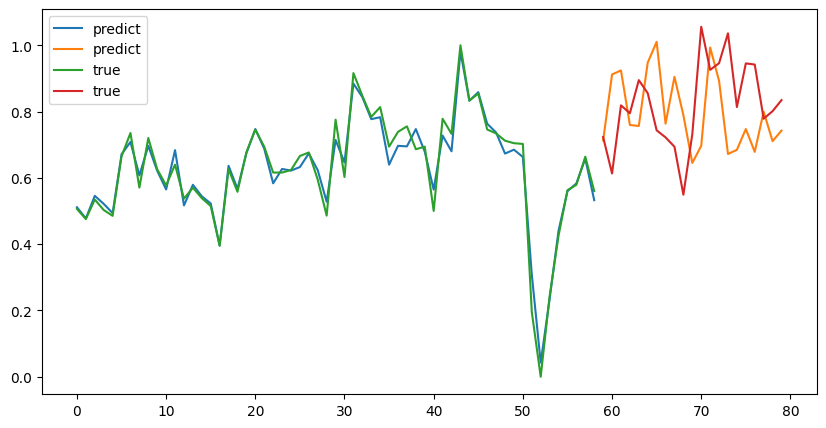

In [371]:
engine.plot_predict_real()

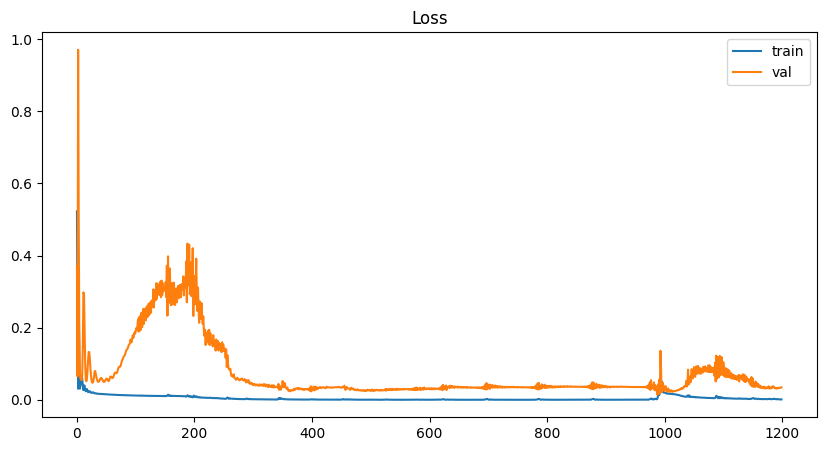

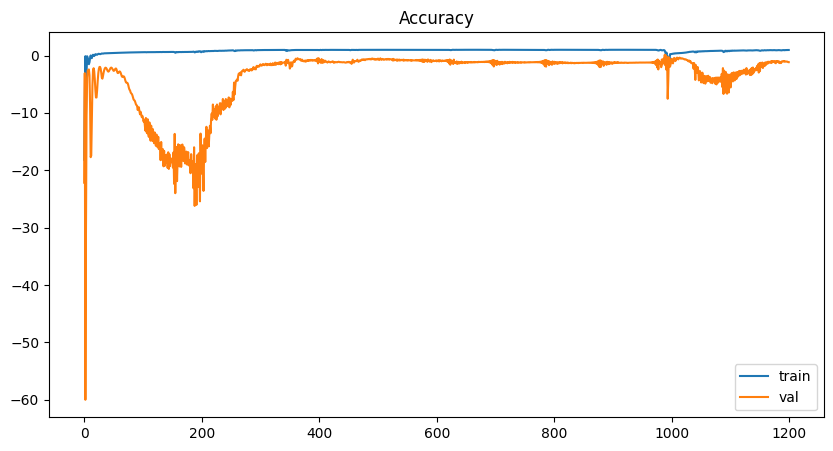

In [372]:
engine.plot_loss()
engine.plot_acc()

In [376]:
engine.save()

In [42]:
test_loss, test_acc, true_predict_list = engine.test(loss_fn=loss_fn)
test_acc

[!!!IMPORTANT NOTE!!!]
The test_function provided here is intended solely for the final model analysis and reporting purposes.
Please refrain from using it as a general-purpose function in your own projects. Always refer to
the appropriate train and validation data for developing and fine-tuning your own models.


TypeError: object of type 'NoneType' has no len()

In [104]:
%load_ext tensorboard
%tensorboard --logdir=runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
